# New Section

Visit **ChrisMcCormickAI** on YouTube for more explanation.
[Image Reference](https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP#scrollTo=86C9objaKu8f)

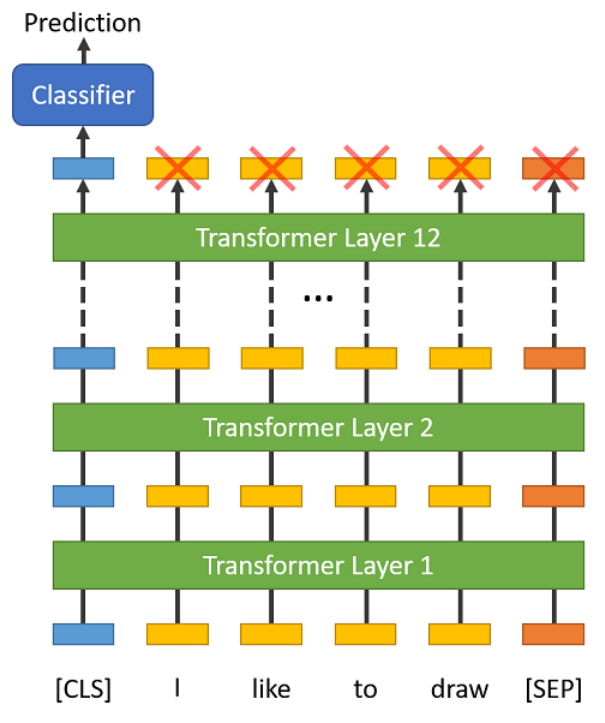

## **1. Cek resource**

In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wget

## **2. Download & load dataset**

In [ ]:
import wget
import os

print("Downloading dataset...")

url = 'https://github.com/ridife/dataset-idsa/archive/master.zip'

if not os.path.exists('./dataset-idsa.zip'):
  wget.download(url, './dataset-idsa.zip')

In [ ]:
if not os.path.exists('./dataset-idsa-master'):
  !unzip dataset-idsa.zip

In [ ]:
import pandas as pd

df = pd.ExcelFile("/content/drive/MyDrive/data_polarityv2.xlsx").parse()
df.shape

(3731, 10)

In [ ]:
df['polarity'] = df['polarity'].replace(-1, 2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x=df.polarity.value_counts()
sns.barplot(x.index)
plt.gca().set_ylabel('samples')

ValueError: ignored

In [ ]:
sentences = df.clean_text.values
labels = df.polarity.values  

## **3. Load BERT Tokenizer**

In [ ]:
from transformers import BertTokenizer

print("Loading BERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

Loading BERT Tokenizer


In [ ]:
df.sample(5)

,created_at,id,reply_count,retweet_count,favorite_count,username,clean_text,preprocessed_text,polarity_score,polarity
1402,Tue May 16 14:03:50 +0000 2023,1658473335624450048,0,0,0,hourlyyucil,capek jadi angkatan percobaan trs mulai dr ppd...,"['capek', 'angkatan', 'percobaan', 'trs', 'dr'...",0,neutral
2141,Tue May 09 16:16:31 +0000 2023,1655970011834650112,0,0,0,eunchaeturu,kelas kerasa capek bgt soalnya uda beda kuriku...,"['kelas', 'kerasa', 'capek', 'bgt', 'uda', 'be...",-2,negative
163,Mon May 15 03:20:32 +0000 2023,1657949054595399936,0,0,0,tribunlampung_,cerita warga jalan rusak bertahuntahun di bali...,"['cerita', 'warga', 'jalan', 'rusak', 'bertahu...",-3,negative
2325,Mon May 15 15:50:28 +0000 2023,1658137781670129920,0,0,0,cl4udin4,dia hanya mengambil sesuai kebutuhan kalo pung...,"['mengambil', 'sesuai', 'kebutuhan', 'kalo', '...",10,positive
2458,Mon May 15 08:14:38 +0000 2023,1658023069108310016,0,0,0,imigrasi_trk,kanim tarakan berkomitmen untuk melayani masya...,"['kanim', 'tarakan', 'berkomitmen', 'melayani'...",0,neutral


In [ ]:
print("Original: ", sentences[0])

print("Tokenized: ", tokenizer.tokenize(sentences[0]))

print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Original:  saat kota yang lain sibuk berlomba agar wisatawan mau datang ke kotanya image jogja justru rusak dengan ramainya klitih parkir dengan harga tidak masuk akal yg membuat pudarnya image jogja sebagai kota yang berhati nyaman
Tokenized:  ['saat', 'kota', 'yang', 'lain', 'si', '##buk', 'ber', '##lom', '##ba', 'agar', 'wisata', '##wan', 'mau', 'datang', 'ke', 'kota', '##nya', 'image', 'jog', '##ja', 'just', '##ru', 'rusa', '##k', 'dengan', 'ramai', '##nya', 'kl', '##iti', '##h', 'park', '##ir', 'dengan', 'harga', 'tidak', 'masuk', 'aka', '##l', 'yg', 'membuat', 'pu', '##dar', '##nya', 'image', 'jog', '##ja', 'sebagai', 'kota', 'yang', 'ber', '##hat', '##i', 'nya', '##man']
Token IDS:  [15416, 13874, 10290, 12796, 10193, 59015, 64560, 21440, 10579, 31451, 75796, 15134, 15688, 41034, 11009, 13874, 10753, 16117, 63643, 10295, 12125, 11859, 25598, 10167, 10722, 63780, 10753, 43298, 14119, 10243, 10826, 10952, 10722, 58951, 12017, 33722, 36710, 10159, 95759, 21474, 25200, 15802, 10753,

In [ ]:
input_ids = []

for sent in sentences:
  encoded_sent = tokenizer.encode(
      str(sent),
      add_special_tokens = True
  )
  input_ids.append(encoded_sent)

print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])



Original:  saat kota yang lain sibuk berlomba agar wisatawan mau datang ke kotanya image jogja justru rusak dengan ramainya klitih parkir dengan harga tidak masuk akal yg membuat pudarnya image jogja sebagai kota yang berhati nyaman
Token IDs:  [101, 15416, 13874, 10290, 12796, 10193, 59015, 64560, 21440, 10579, 31451, 75796, 15134, 15688, 41034, 11009, 13874, 10753, 16117, 63643, 10295, 12125, 11859, 25598, 10167, 10722, 63780, 10753, 43298, 14119, 10243, 10826, 10952, 10722, 58951, 12017, 33722, 36710, 10159, 95759, 21474, 25200, 15802, 10753, 16117, 63643, 10295, 11155, 13874, 10290, 64560, 20452, 10116, 19483, 10629, 102]


In [ ]:
print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  95


In [ ]:
from keras.utils import pad_sequences

MAX_LEN = 64

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")

Padding/truncating all sentences to 64 values
Padding token: "[PAD]", ID: 0
Done


In [ ]:
input_ids[0]

array([  101, 15416, 13874, 10290, 12796, 10193, 59015, 64560, 21440,
       10579, 31451, 75796, 15134, 15688, 41034, 11009, 13874, 10753,
       16117, 63643, 10295, 12125, 11859, 25598, 10167, 10722, 63780,
       10753, 43298, 14119, 10243, 10826, 10952, 10722, 58951, 12017,
       33722, 36710, 10159, 95759, 21474, 25200, 15802, 10753, 16117,
       63643, 10295, 11155, 13874, 10290, 64560, 20452, 10116, 19483,
       10629,   102,     0,     0,     0,     0,     0,     0,     0,
           0])

In [ ]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)

## **4. Persiapkan data**

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(input_ids,
                                                                      labels,
                                                                      random_state=2017,
                                                                      test_size=0.1)
train_mask, test_mask, _, _ = train_test_split(attention_mask,
                                               labels,
                                               random_state=2017,
                                               test_size=0.1)

train_input, validation_input, train_labels, validation_labels = train_test_split(train_input,
                                                                                  train_labels,
                                                                                  random_state=2018,
                                                                                  test_size=0.15)
train_mask, validation_mask, _, _ = train_test_split(train_mask,
                                                     train_mask,
                                                     random_state=2018,
                                                     test_size=0.15)

In [ ]:
import numpy as np
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Validation ==")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)

print("\n== Test ==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (2853, 64)
Label:  (2853,)
Mask:  (2853, 64)

== Validation ==
Input:  (504, 64)
Label:  (504,)
Mask:  (504, 64)

== Test ==
Input:  (374, 64)
Label:  (374,)
Mask:  (374, 64)


In [ ]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

TypeError: ignored

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

## **5. Persiapkan model pre-trained BERT**

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False
)

model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (105879, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.

In [ ]:
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 10

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                             num_warmup_steps = 0,
                                             num_training_steps = total_steps)

In [ ]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

## **6. Training BERT**

In [ ]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

  # ===================================
  #              Training
  # ===================================

  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0

  model.train()

  # For each batch of training data
  for step, batch in enumerate(train_dataloader):
    
    # Progress update every 40 batches
    if step % 40 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))
    
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
    
    loss = outputs[0]

    total_loss += loss.item()

    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    optimizer.step()

    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)

  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

  # ===================================
  #             Validation
  # ===================================

  print("Running Validation...")

  t0 = time.time()

  model.eval()

  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:

    batch = tuple(t.to(device) for t in batch)

    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)

    eval_accuracy += tmp_eval_accuracy

    nb_eval_steps += 1
  
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 10 =======
Training...
Batch    40 of   259.     Elapsed: 0:00:16
Batch    80 of   259.     Elapsed: 0:00:32
Batch   120 of   259.     Elapsed: 0:00:49
Batch   160 of   259.     Elapsed: 0:01:05
Batch   200 of   259.     Elapsed: 0:01:21
Batch   240 of   259.     Elapsed: 0:01:37
   Average training loss: 0.97
   Training epoch took: 0:01:45
Running Validation...
   Accuracy: 0.62
   Validation took: 0:00:06
======= Epoch 2 / 10 =======
Training...
Batch    40 of   259.     Elapsed: 0:00:16
Batch    80 of   259.     Elapsed: 0:00:33
Batch   120 of   259.     Elapsed: 0:00:49
Batch   160 of   259.     Elapsed: 0:01:05
Batch   200 of   259.     Elapsed: 0:01:21
Batch   240 of   259.     Elapsed: 0:01:37
   Average training loss: 0.79
   Training epoch took: 0:01:45
Running Validation...
   Accuracy: 0.63
   Validation took: 0:00:06
======= Epoch 3 / 10 =======
Training...
Batch    40 of   259.     Elapsed: 0:00:16
Batch    80 of   259.     Elapsed: 0:00:32
Batch   120 o

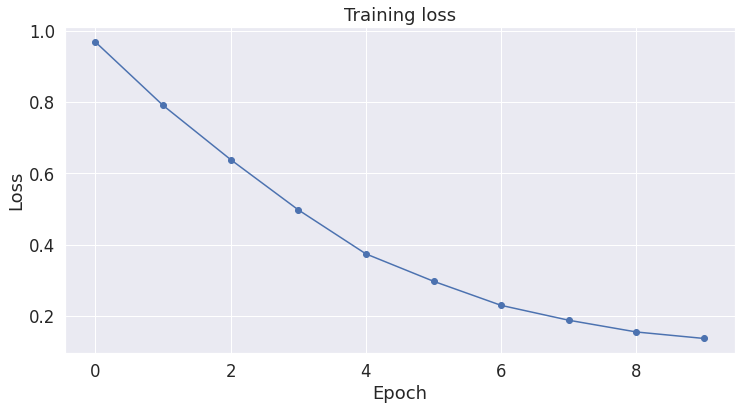

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

## **7. Predict dan Evaluate**

In [ ]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)
    
  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print(" DONE.")

Predicting labels for 1,081 test sentences
 DONE.


In [ ]:
from sklearn.metrics import matthews_corrcoef

flat_prediction = [item for sublist in prediction for item in sublist]
flat_prediction = np.argmax(flat_prediction, axis=1).flatten()

flat_true_labels = [item for sublist in true_labels for item in sublist]

mcc = matthews_corrcoef(flat_true_labels, flat_prediction)

print("MCC: %.3f" %mcc)

MCC: 0.413


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(flat_true_labels, flat_prediction)

print("ACC: %.3f" %acc)


ACC: 0.634
